In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
%matplotlib inline

In [5]:
# constants
secondsPerDay = 86400

# plotting params
deepIndex = 35

# io params
loc = f"/scratch/hcm7920/ambData/levelMean/"
conc = ["0", "100"]
saveloc = "/home/hcm7920/experiments/arcticMiddepthBI/plots/"

In [8]:
time = np.load(loc+"../grid/gridTime.npy")
levs = np.load(loc+"../grid/gridLevs.npy")
keLevMax = np.load(loc+"levelMaxKE.npy")
keLevMean = np.load(loc+"levelMeanKE.npy")

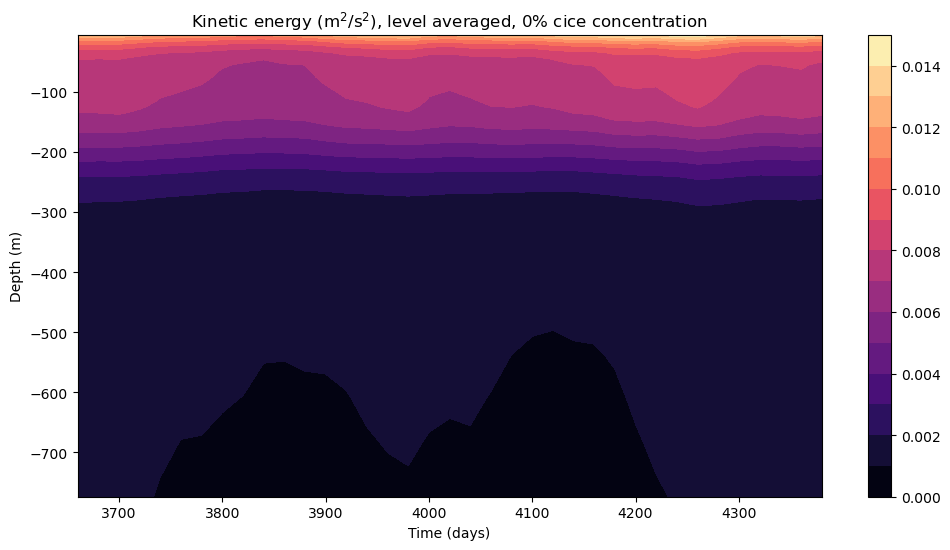

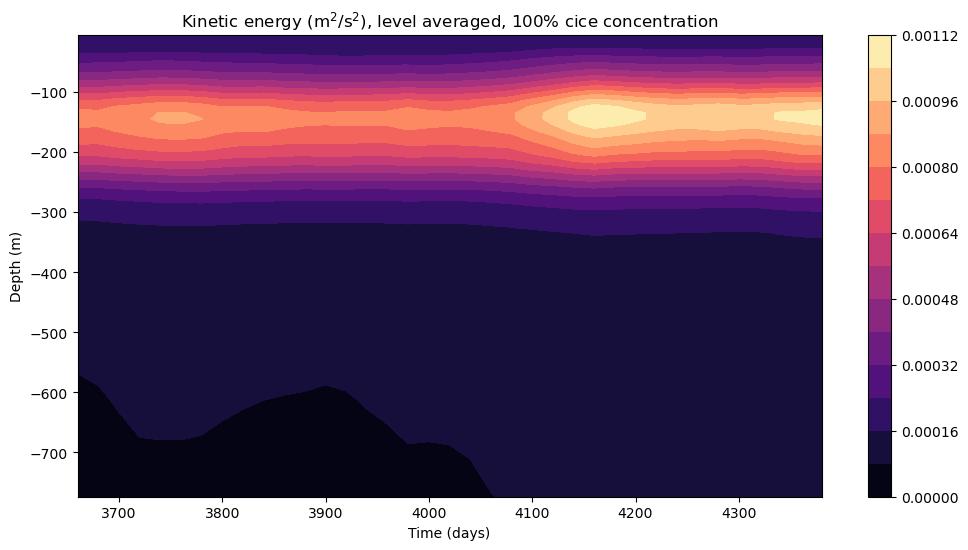

In [9]:
# make plot
for i in range(len(conc)):
    plt.figure(figsize=(12,6))
    plt.contourf(time,levs[:deepIndex],keLevMean[:,:deepIndex,i].T,
                 15,cmap="magma")
    plt.xlabel("Time (days)")
    plt.ylabel("Depth (m)")
    plt.title(r"Kinetic energy ($\mathrm{m}^2/\mathrm{s}^2$), level averaged, "
              +f"{conc[i]}% cice concentration")
    plt.colorbar()
#     plt.savefig(saveloc+f"levelAverageKE{conc[i]}Hov.png",
#                 bbox_inches="tight", pad_inches=0)

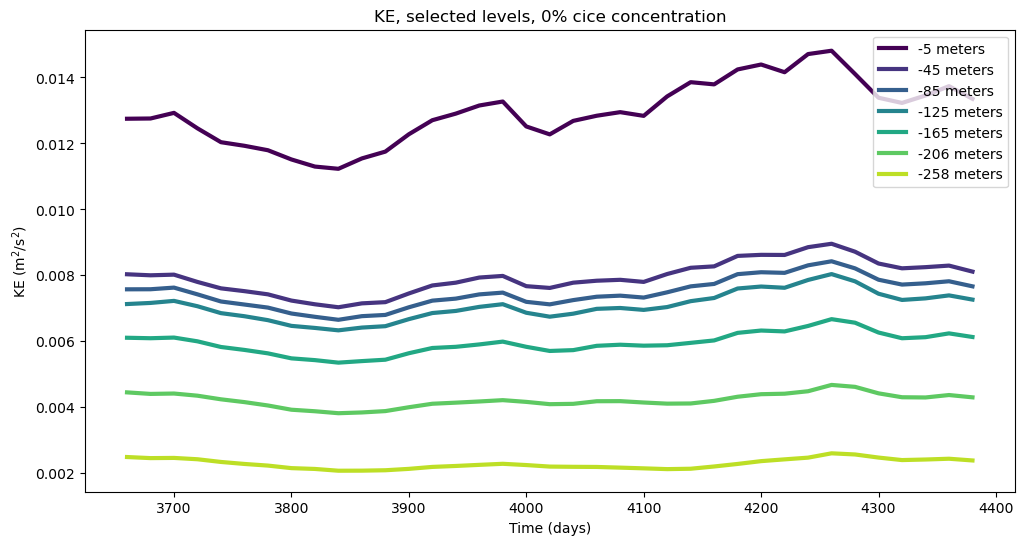

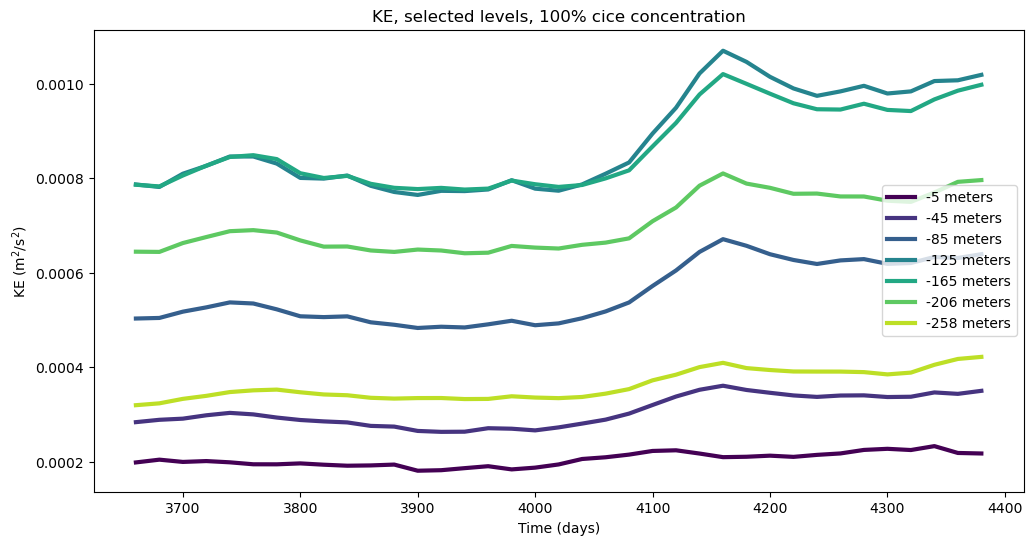

In [10]:
# make another plot
for i in range(len(conc)):
    levsPlotted = 7
    colors = plt.cm.viridis(np.linspace(0,0.9,levsPlotted))
    plt.figure(figsize=(12,6))
    for index in range(levsPlotted):
        plt.plot(time,keLevMean[:,index*4,i],color=colors[index],
                 label=f"{levs[index*4]:.0f} meters",linewidth=3)
    plt.xlabel("Time (days)")
    plt.ylabel("KE ($\mathrm{m}^2/\mathrm{s}^2$)")
    plt.title(f"KE, selected levels, {conc[i]}% cice concentration")
    plt.legend()

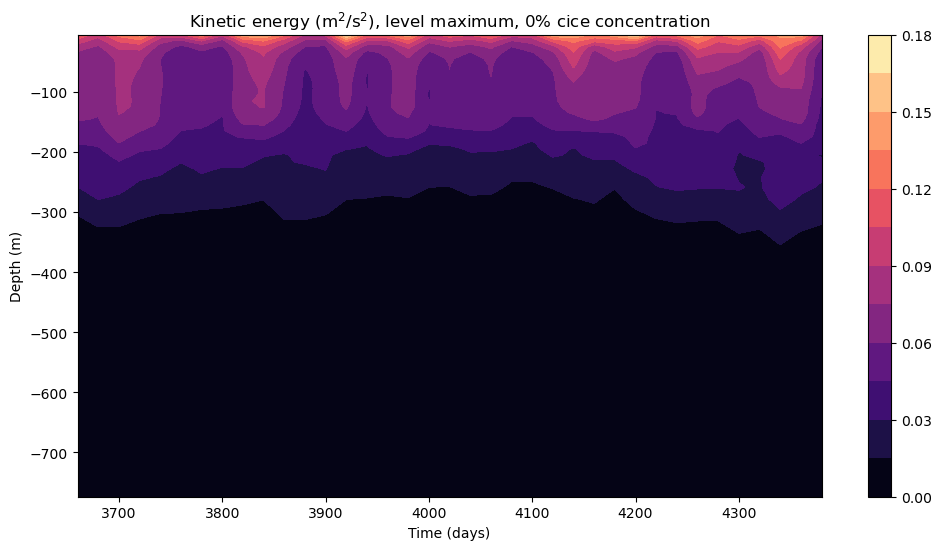

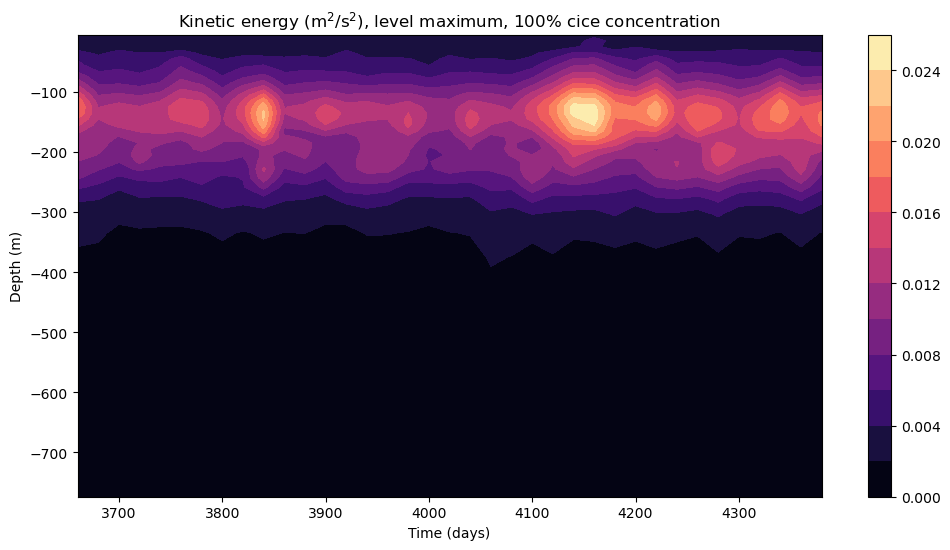

In [11]:
# make plot
for i in range(len(conc)):
    plt.figure(figsize=(12,6))
    plt.contourf(time,levs[:deepIndex],keLevMax[:,:deepIndex,i].T,
                 15,cmap="magma")
    plt.xlabel("Time (days)")
    plt.ylabel("Depth (m)")
    plt.title(r"Kinetic energy ($\mathrm{m}^2/\mathrm{s}^2$), level maximum, "
              +f"{conc[i]}% cice concentration")
    plt.colorbar()

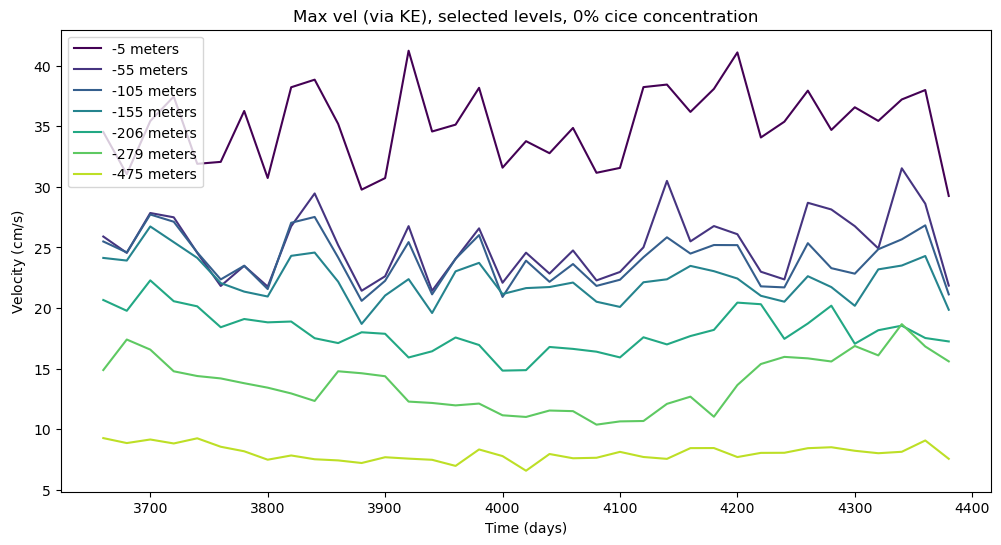

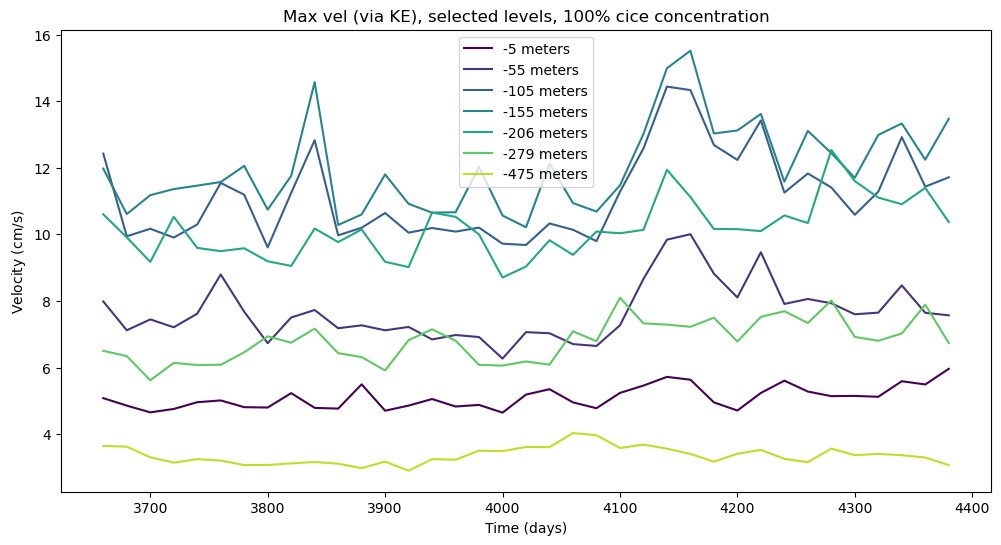

In [12]:
# make another plot
for i in range(len(conc)):
    levsPlotted = 7
    colors = plt.cm.viridis(np.linspace(0,0.9,levsPlotted))
    plt.figure(figsize=(12,6))
    for index in range(levsPlotted):
        plt.plot(time,np.sqrt(keLevMax[:,index*5,i])*100,
                 color=colors[index],label=f"{levs[index*5]:.0f} meters")
    plt.xlabel("Time (days)")
    plt.ylabel("Velocity ($\mathrm{cm}/\mathrm{s}$)")
    plt.title(f"Max vel (via KE), selected levels, {conc[i]}% cice concentration")
    plt.legend()
    plt.savefig(saveloc+f"levelMaxVel{conc[i]}Line.png",
                bbox_inches="tight", pad_inches=0)